In [3]:
!conda install -y numpy
!conda install -y matplotlib
!conda install -y pandas
!conda install -y scikit-learn
!conda install -y seaborn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Youn\Anaconda3\envs\stock

  added / updated specs:
    - numpy


The following NEW packages will be INSTALLED:

  blas               pkgs/main/win-64::blas-1.0-mkl
  intel-openmp       pkgs/main/win-64::intel-openmp-2020.2-254
  mkl                pkgs/main/win-64::mkl-2020.2-256
  mkl-service        pkgs/main/win-64::mkl-service-2.3.0-py37h196d8e1_0
  mkl_fft            pkgs/main/win-64::mkl_fft-1.3.0-py37h46781fe_0
  mkl_random         pkgs/main/win-64::mkl_random-1.1.1-py37h47e9c7a_0
  numpy              pkgs/main/win-64::numpy-1.19.2-py37hadc3359_0
  numpy-base         pkgs/main/win-64::numpy-base-1.19.2-py37ha3acd2a_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done




==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [2]:
vlo_prices = pd.read_csv("../data/stock/vlo/VLO_5y_prices.csv")

vlo_prices["year"] = vlo_prices["Date"].str.split('-').str[0]
vlo_prices["month"] = vlo_prices["Date"].str.split('-').str[1]
vlo_prices["year_month"] = vlo_prices["year"] + "" + vlo_prices["month"]

print(vlo_prices.head())

# year_filtered_vlo_prices = pd.read_csv("../data/stock/vlo/VLO_5y_prices.csv", parse_dates=["Date"], index_col="Date")

print(vlo_prices.info())
del vlo_prices['Adj Close']

# plt.figure(figsize=(15,15))
# sns.heatmap(data = vlo_prices.corr(), annot=True, 
# fmt = '.2f', linewidths=.5, cmap='Blues')

# car_features = ['x', 'y', 'z', 'v']

# X = car.loc[:, car_features].values
# Y = car.loc[:, 'label'].values

         Date       Open       High        Low      Close  Adj Close   Volume  \
0  2021-04-14  71.120003  73.510002  70.980003  72.279999  72.279999  3460300   
1  2021-04-13  70.120003  70.860001  69.540001  70.279999  70.279999  3951900   
2  2021-04-12  71.930000  72.820000  70.120003  70.300003  70.300003  3111800   
3  2021-04-09  72.550003  73.230003  70.779999  71.089996  71.089996  3501300   
4  2021-04-08  73.419998  73.779999  71.910004  72.879997  72.879997  4285400   

   year month year_month  
0  2021    04     202104  
1  2021    04     202104  
2  2021    04     202104  
3  2021    04     202104  
4  2021    04     202104  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1258 non-null   object 
 1   Open        1258 non-null   float64
 2   High        1258 non-null   float64
 3   Low         1258 non-null   float6

In [ ]:
vlo_prices.to_csv("../data/stock/vlo/VLO_5y_prices_year_month.csv")

In [3]:
train = vlo_prices[vlo_prices.year_month != "202104"]
test = vlo_prices[vlo_prices.year_month == "202104"]

In [4]:
feature_names = ['Open', 'High', 'Low', 'Volume']

X_train = train[feature_names]
X_test = test[feature_names]

label_name = "Close"
Y_train = train[label_name]

Y_test = test[label_name]

print(X_train.shape)
print(X_test.shape)

(1249, 4)
(9, 4)


In [5]:
lm = LinearRegression(fit_intercept=True, normalize=True, n_jobs=None)
lm.fit(X_train, Y_train)
accuracy = lm.score(X_test, Y_test)

print("Linear Regression test file accuracy: " + str(accuracy))

lm.coef_

Linear Regression test file accuracy: 0.8297974138262821


array([-5.10542977e-01,  7.52260297e-01,  7.57618958e-01,  4.56356568e-09])

In [49]:
X_Cols = X_train.rename(columns= {'Open': '시가', 'High': '고가', 'Low': '저가', 'Volume': '거래량' })

print(X_train.columns)
coefs = pd.DataFrame(zip(X_Cols.columns,lm.coef_), columns = ['features', 'coefficients'])


coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index)

Index(['Open', 'High', 'Low', 'Volume'], dtype='object')


,features,coefficients
2,저가,7.576190e-01
1,고가,7.522603e-01
0,시가,-5.105430e-01
3,거래량,4.563566e-09


Text(0.5, 1.0, 'Prices vs Predicted price Index: $Y_i$ vs $\\hat{Y}_i$')

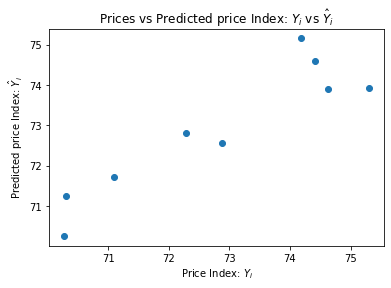

In [6]:
Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)

plt.xlabel("Price Index: $Y_i$")
plt.ylabel("Predicted price Index: $\hat{Y}_i$")
plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")

In [14]:
filename = 'vlo_lr_model.sav'
pickle.dump(lm, open("../model/" + filename, 'wb'))

In [15]:
tesset = [[72.14, 75.33, 71.31, 3792700]]
loaded_model = pickle.load(open("../model/" + filename, 'rb'))
abc = loaded_model.predict(tesset)
# result = loaded_model.score(X_test, Y_test)
# print(result)
print(abc)

[73.92059186]
